In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import os

# Define the directory where the files are extracted
extraction_path = "C:\\Users\\DELL\\OneDrive - Digit Connet Africa\\Desktop\\Jupeter note project\\3mtt capstone project\\"
# List all files in the directory
files = os.listdir(extraction_path)
print("Files in directory:", files)

Files in directory: ['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']


In [154]:
os.chdir("C:\\Users\\DELL\\OneDrive - Digit Connet Africa\\Desktop\\Jupeter note project\\3mtt capstone project\\") 

# Load datasets
day_wise = pd.read_csv("day_wise.csv")
usa_county_wise = pd.read_csv("usa_county_wise.csv")
full_grouped = pd.read_csv("full_grouped.csv")
country_wise_latest = pd.read_csv("country_wise_latest.csv"),
covid_19_clean_complete = pd.read_csv("covid_19_clean_complete.csv"),
worldometer_data = pd.read_csv("worldometer_data.csv"),
# Print confirmation
print("Files loaded successfully!")


Files loaded successfully!


In [155]:
# Iterate over the files and load the CSVs into DataFrames
for file in files:
    file_path = os.path.join(extraction_path, file)
    if file.endswith('.csv'):
        print(f"Loading file: {file}")
        data = pd.read_csv(file_path)
        print(f"Data loaded from {file}:\n", data.head(), "\n")
    else:
        print(f"Skipping non-CSV file: {file}")

Loading file: country_wise_latest.csv
Data loaded from country_wise_latest.csv:
   Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 wee

In [157]:
# Convert 'Date' column to datetime format with the correct format
usa_county_wise['Date'] = pd.to_datetime(usa_county_wise['Date'], format='%m/%d/%y', errors='coerce')

# Check for any invalid dates
invalid_dates = usa_county_wise[usa_county_wise['Date'].isna()]
if not invalid_dates.empty:
    print("Invalid date rows:")
    print(invalid_dates)

# Optionally, drop rows with invalid dates
usa_county_wise = usa_county_wise.dropna(subset=['Date'])

# Now check the first few rows to confirm successful conversion
print(usa_county_wise['Date'].head())



0   2020-01-22
1   2020-01-22
2   2020-01-22
3   2020-01-22
4   2020-01-22
Name: Date, dtype: datetime64[ns]


In [170]:
# Directory where your CSV files are located
data_directory = "C:\\Users\\DELL\\OneDrive - Digit Connet Africa\\Desktop\\Jupeter note project\\3mtt capstone project\\"  

# List all CSV files in the directory
csv_files = [file for file in os.listdir(data_directory) if file.endswith(".csv")]

# Load all datasets into a dictionary
datasets = {}
for file in csv_files:
    file_path = os.path.join(data_directory, file)
    datasets[file] = pd.read_csv(file_path)

# Fill or drop missing values for each dataset
for name, df in datasets.items():
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

    # Fill or drop based on context
    if "Date" in df.columns:
        # If the dataset contains a 'Date' column, fill missing values with zeros
        df.fillna(0, inplace=True)
    else:
        # Otherwise, drop rows with missing values
        df.dropna(inplace=True)

    # Print the number of missing values after handling
    print(f"After handling missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

    # Optionally save cleaned datasets
    df.to_csv(os.path.join(data_directory, f"cleaned_{name}"), index=False)

print("Missing values have been handled and cleaned datasets saved.")



Missing values in country_wise_latest.csv:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


After handling missing values in country_wise_latest.csv:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


Missing values in covid_19_cl

In [171]:
# Remove duplicate rows in each dataset
for name, df in datasets.items():
    before = len(df)
    df.drop_duplicates(inplace=True)
    after = len(df)
    print(f"{name}: Removed {before - after} duplicate rows.")


country_wise_latest.csv: Removed 0 duplicate rows.
covid_19_clean_complete.csv: Removed 0 duplicate rows.
day_wise.csv: Removed 0 duplicate rows.
full_grouped.csv: Removed 0 duplicate rows.
usa_county_wise.csv: Removed 0 duplicate rows.
worldometer_data.csv: Removed 0 duplicate rows.


In [173]:
# Standardize date and location formats for each file
for file in files:
    file_path = os.path.join(extraction_path, file)
    
    if file.endswith('.csv'):
        # Load the CSV file
        data = pd.read_csv(file_path)

        # Standardize date columns (assuming column names contain 'date')
        for col in data.columns:
            if 'Date' in col.lower():  # Check if column is a date column
                try:
                    # Try parsing the date and convert to a standardized format
                    data[col] = pd.to_datetime(data[col], errors='coerce', format='%Y-%m-%d')
                except Exception as e:
                    print(f"Could not parse date in column {col} of {file}: {e}")
        
        # Standardize location columns (assuming column names contain 'location' or 'country')
        for col in data.columns:
            if 'location' in col.lower() or 'country' in col.lower():
                data[col] = data[col].str.strip().str.lower()
        
        # Save or process the standardized data (if needed)
        # data.to_csv(file_path, index=False)  # Uncomment to save the changes to the file
        
        print(f"Date and location formats standardized for {file}.\n")



Date and location formats standardized for country_wise_latest.csv.

Date and location formats standardized for covid_19_clean_complete.csv.

Date and location formats standardized for day_wise.csv.

Date and location formats standardized for full_grouped.csv.

Date and location formats standardized for usa_county_wise.csv.

Date and location formats standardized for worldometer_data.csv.



In [174]:
# Print dataset summaries
for name, df in datasets.items():
    print(f"{name} Dataset Summary:")
    print(df.info())
    print(df.head(), "\n")


country_wise_latest.csv Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  W

In [175]:
# Add new features to relevant datasets
for name, df in datasets.items():
    if "Date" in df.columns:  # Only apply to datasets with date
        print(f"Feature Engineering for {name}:")

        # Calculate daily growth rate of confirmed cases
        if "Confirmed" in df.columns:
            df['Daily Growth Rate'] = df['Confirmed'].pct_change().fillna(0) * 100

        # Calculate mortality rate: Deaths / Confirmed
        if "Deaths" in df.columns and "Confirmed" in df.columns:
            df['Mortality Rate'] = (df['Deaths'] / df['Confirmed']).fillna(0) * 100

        # Cases per population (if Population exists)
        if "Population" in df.columns and "Confirmed" in df.columns:
            df['Cases per 100k'] = (df['Confirmed'] / df['Population']) * 100000

        print(df.head(), "\n")


Feature Engineering for covid_19_clean_complete.csv:
  Province/State      Country       Lat       Long       Date  Confirmed  \
0              0  Afghanistan  33.93911  67.709953 2020-01-22          0   
1              0      Albania  41.15330  20.168300 2020-01-22          0   
2              0      Algeria  28.03390   1.659600 2020-01-22          0   
3              0      Andorra  42.50630   1.521800 2020-01-22          0   
4              0       Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  Daily Growth Rate  \
0       0          0       0  Eastern Mediterranean                0.0   
1       0          0       0                 Europe                0.0   
2       0          0       0                 Africa                0.0   
3       0          0       0                 Europe                0.0   
4       0          0       0                 Africa                0.0   

   Mortality Rate  
0             0.0  
1    

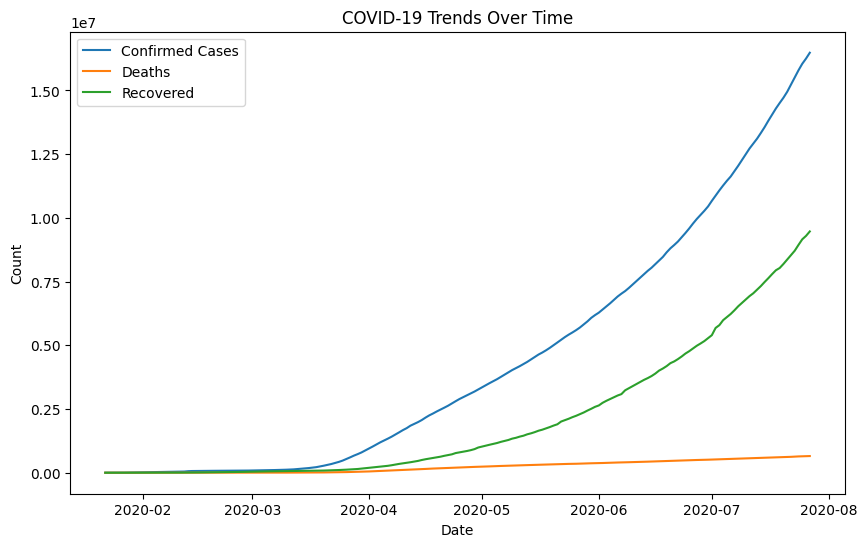

In [177]:
Plot total cases over time from 'day_wise' dataset
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Confirmed", data=datasets['day_wise.csv'], label="Confirmed Cases")
sns.lineplot(x="Date", y="Deaths", data=datasets['day_wise.csv'], label="Deaths")
sns.lineplot(x="Date", y="Recovered", data=datasets['day_wise.csv'], label="Recovered")
plt.title("COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


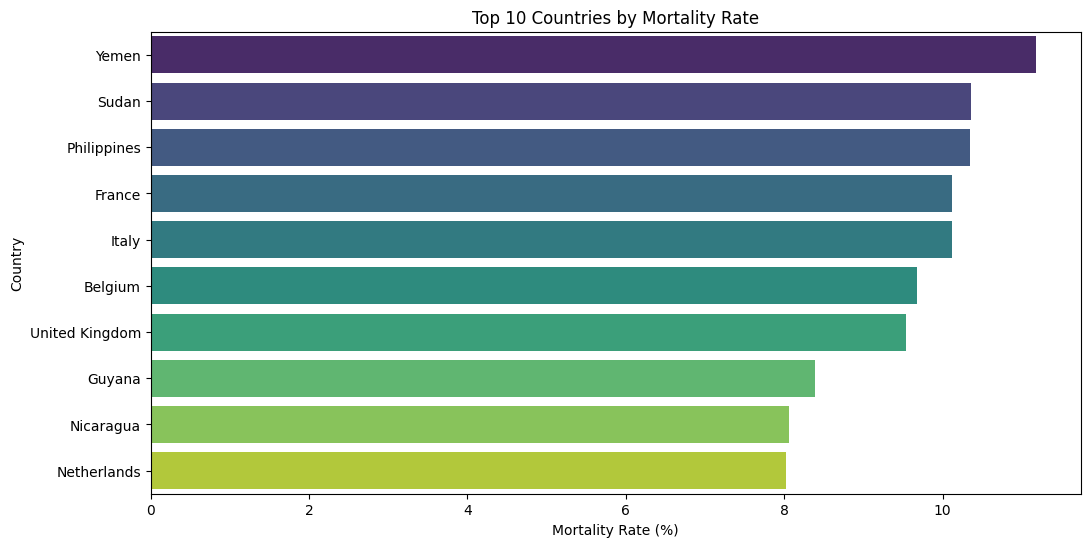

In [181]:
# Assuming 'datasets' is already defined and 'full_grouped.csv' is loaded correctly
mortality_data = datasets['full_grouped.csv'].groupby("Country")['Mortality Rate'].mean().sort_values(ascending=False).head(10)

# Create the bar plot using 'hue' with the same data as 'y'
plt.figure(figsize=(12, 6))
sns.barplot(x=mortality_data.values, y=mortality_data.index, palette="viridis", hue=mortality_data.index)
plt.title("Top 10 Countries by Mortality Rate")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Country")
plt.show()


In [195]:
from statsmodels.tsa.arima.model import ARIMA

# Use 'day_wise' dataset for time-series forecasting
time_series_data = datasets['day_wise.csv'][['Date', 'Confirmed']].set_index('Date')
time_series_data = time_series_data.asfreq('D').fillna(0)  # Ensure daily frequency

# Split into training and test sets
train_size = int(len(time_series_data) * 0.8)
train, test = time_series_data[:train_size], time_series_data[train_size:]


In [198]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(train)

# If p-value is greater than 0.05, the data is non-stationary
if result[1] > 0.05:
    print("Data is non-stationary, you may need further differencing.")
else:
    print("Data is stationary.")


Data is non-stationary, you may need further differencing.


In [197]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Perform ADF test to check stationarity
result = adfuller(train)
if result[1] > 0.05:
    print("Data is non-stationary, consider differencing further.")
else:
    print("Data is stationary.")

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Order: (p, d, q)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))


Data is non-stationary, consider differencing further.


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


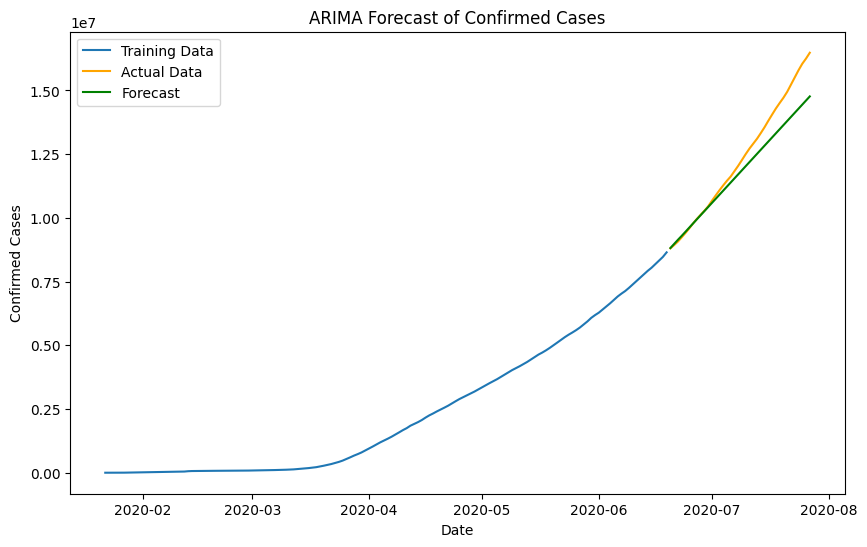

In [199]:
plt.figure(figsize=(10, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual Data", color="orange")
plt.plot(test.index, forecast, label="Forecast", color="green")
plt.title("ARIMA Forecast of Confirmed Cases")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()


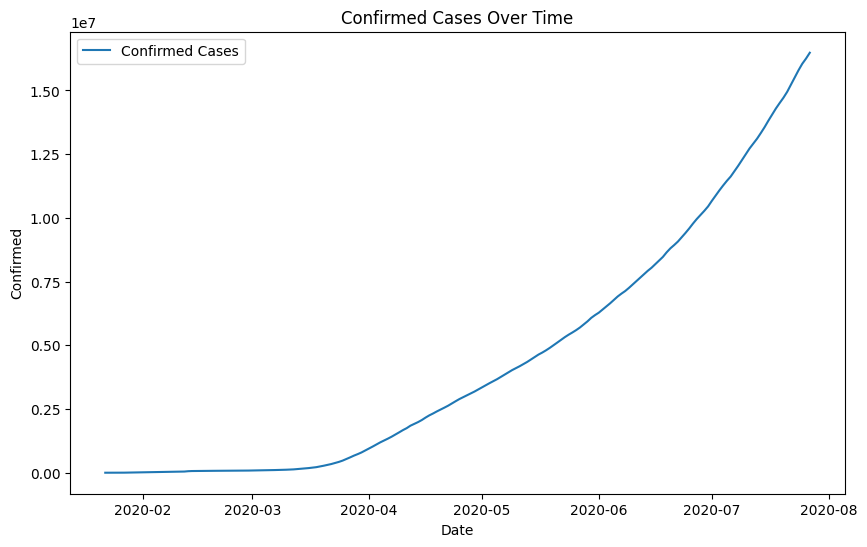

In [216]:
# Save plots to file
plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Confirmed", data=datasets['day_wise.csv'], label="Confirmed Cases")
plt.title("Confirmed Cases Over Time")
plt.savefig("confirmed_cases_trend.png")

# Example: Export cleaned dataset
datasets['full_grouped.csv'].to_csv("cleaned_full_grouped.csv", index=False)
